<a href="https://colab.research.google.com/github/Manu-Anand/tf_certfication/blob/master/stroke_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train_2v.csv to train_2v.csv


In [146]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 6.8MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math 
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as pltp
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
stroke_data = pd.read_csv('train_2v.csv')

In [81]:
# Smoking status got many Nan Values. So Drops them. Recheck other alternatives
stroke_data = stroke_data[stroke_data['smoking_status'].notna()]
label_encoding("work_type")
label_encoding("Residence_type")
label_encoding("ever_married")
label_encoding("gender")
label_encoding("smoking_status")
label_names = [0, 1]
stroke_data.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0


Train columns with null values:
 index                0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Train columns with null values:
 index                0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0    28524
1      548
Name: stroke, dtype: int64
class count 0    28524
1      548
Name: stroke, dtype: int64


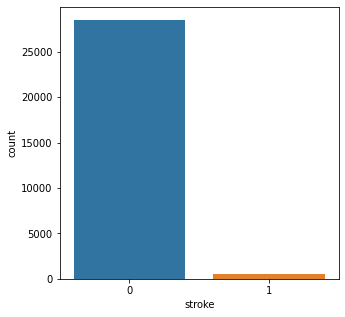

In [86]:
stroke_data.describe(include = 'all')
# The below code shows there are many null values
print('Train columns with null values:\n', stroke_data.isnull().sum())
stroke_data = stroke_data.dropna()
print('Train columns with null values:\n', stroke_data.isnull().sum())
class_count = stroke_data.stroke.value_counts()
stroke_data = stroke_data.reset_index()
print(class_count)
# The below code shows that  the data has class imbalance problem
# The data is unbalanced
rcParams['figure.figsize'] = 5, 5
class_count = stroke_data.stroke.value_counts()
print('class count', class_count)
ax = sns.countplot(x="stroke", data=stroke_data)

In [0]:
stroke_data_x = stroke_data.drop('stroke', axis=1)
stroke_data_y = stroke_data['stroke']

In [0]:
def classify_RandomForestClassifier(estimators): 
  rf_classifier = RandomForestClassifier(n_estimators = estimators, random_state = 0)
  rf_classifier.fit(x_train, y_train)
  return rf_classifier
  #print(sorted(zip(map(lambda x: round(x, 4), rf_classifier.feature_importances_), names), 
            # reverse=True))

Please keep the train_2v.csv in the same folder as the python file

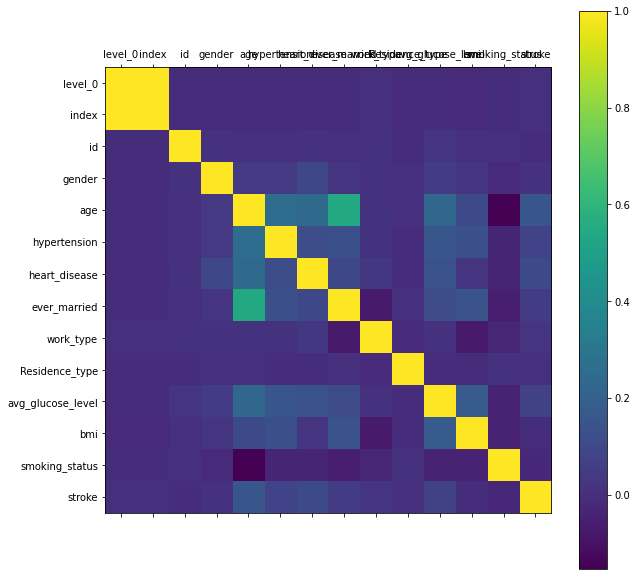

In [91]:
# Displays correlation metrics
# Inference - Age and marriage has some correlation. All other fileds shows very less correlation
rcParams['figure.figsize'] = 10, 10
plt.matshow(stroke_data.corr())
plt.yticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.xticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.colorbar()

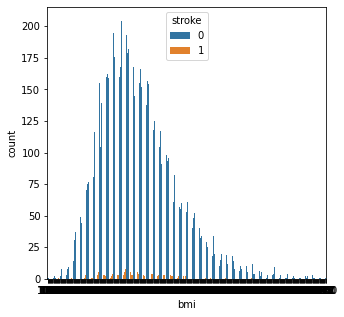

In [89]:

rcParams['figure.figsize'] = 5, 5
ax = sns.countplot(x="bmi", data=stroke_data, hue="stroke")


In [0]:
def best_features():
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(stroke_data_x,stroke_data_y)
  scores = pd.DataFrame(fit.scores_)
  columns = pd.DataFrame(x.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([columns,scores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(10,'Score'))  #print 10 best features

Text(0, 0.5, 'Second Principal Component')

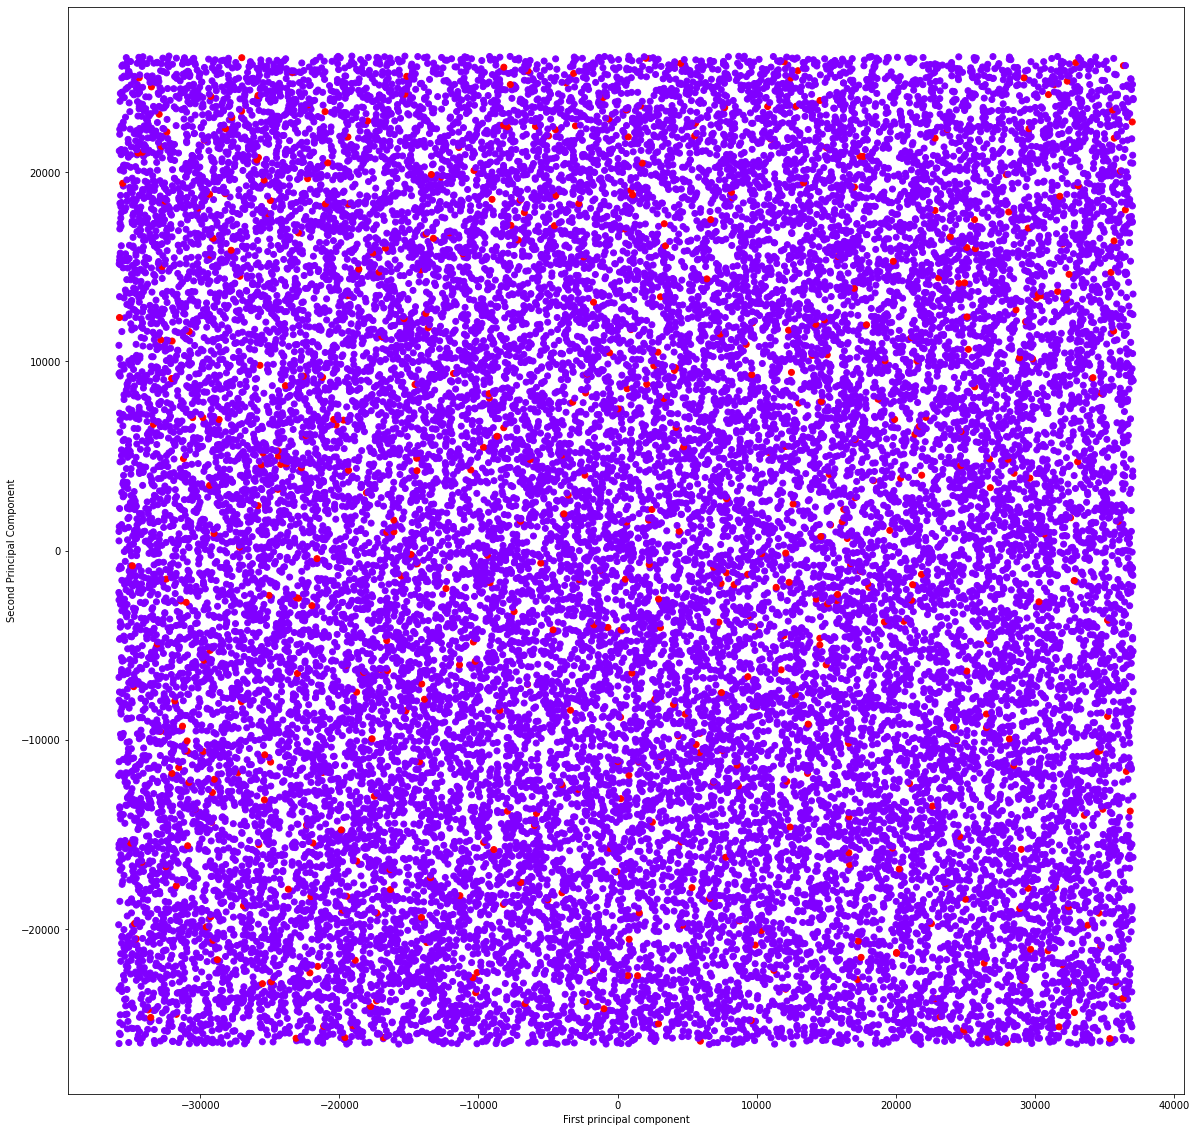

In [95]:
scaled_data = stroke_data.drop('stroke', axis=1)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(20,20))
plt.scatter(x_pca[:,0],x_pca[:,1],c=stroke_data['stroke'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [103]:
# Split the data into predictors and target
x_train, x_test, y_train, y_test = train_test_split(stroke_data_x, stroke_data_y, test_size=0.3, random_state=0, stratify=stroke_data_y)
class_count = y_train.value_counts()
print(class_count)
class_count = y_test.value_counts()
print(class_count)

0    19966
1      384
Name: stroke, dtype: int64
0    8558
1     164
Name: stroke, dtype: int64


             Specs        Score
1               id  9540.645229
0            index  6381.071761
4     hypertension  5079.972768
10             bmi  3187.430081
6     ever_married   304.668141
5    heart_disease   159.924772
2           gender    80.891002
7        work_type    16.822963
8   Residence_type     5.825433
12             NaN     5.094296
0.981196973171291
Confusion Matrics:  [[8558    0]
 [ 164    0]]
Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8558
           1       0.00      0.00      0.00       164

    accuracy                           0.98      8722
   macro avg       0.49      0.50      0.50      8722
weighted avg       0.96      0.98      0.97      8722



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0.5, 1.0, '2-class Precision-Recall curve')

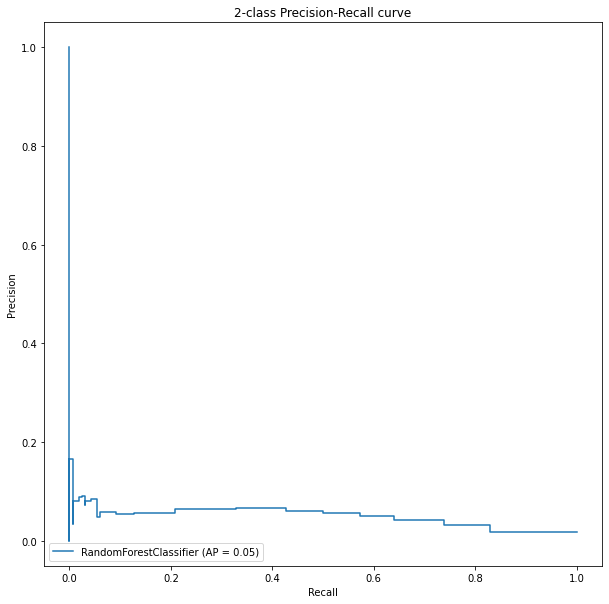

In [98]:
# Invoke RF Classifier
best_features()
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators)
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))

#y_score = rf_classifier.decision_function(X_test)
#average_precision = average_precision_score(y_test, y_score)
#print('Average precision-recall score: {0:0.2f}'.format(
      #average_precision))
disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

             Specs        Score
1               id  9540.645229
0            index  6381.071761
4     hypertension  5079.972768
10             bmi  3187.430081
6     ever_married   304.668141
5    heart_disease   159.924772
2           gender    80.891002
7        work_type    16.822963
8   Residence_type     5.825433
12             NaN     5.094296
0.9283980582524272
Confusion Matrics:  [[5512  193]
 [ 338 1373]]
Classification Report               precision    recall  f1-score   support

           0       0.94      0.97      0.95      5705
           1       0.88      0.80      0.84      1711

    accuracy                           0.93      7416
   macro avg       0.91      0.88      0.90      7416
weighted avg       0.93      0.93      0.93      7416



Text(0.5, 1.0, '2-class Precision-Recall curve')

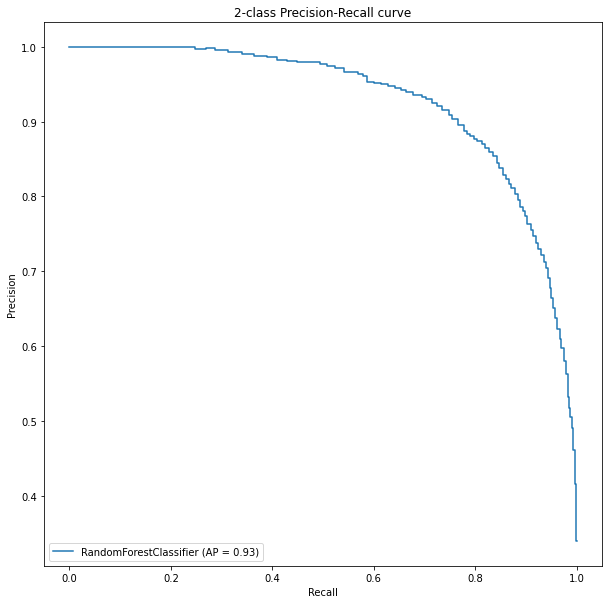

In [104]:
smote_stroke_y= stroke_data_y
smote_stroke_x = stroke_data_x
#Oversmaple the minority class 10% of major class
over_sample = SMOTE(sampling_strategy=0.2)

# Undersample the majority class 50% 
under_sample = RandomUnderSampler(sampling_strategy=0.3)
steps = [('o', over_sample), ('u', under_sample)]
# Add this to pipeline
pipeline = Pipeline(steps=steps)
best_features()
smote_stroke_x, smote_stroke_y = pipeline.fit_resample(smote_stroke_x, smote_stroke_y)


x_train, x_test, y_train, y_test = train_test_split(smote_stroke_x, smote_stroke_y, test_size=0.3, random_state=0, stratify=smote_stroke_y)
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators)
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#plot_classfier(estimators)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))

disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')